In [1]:
import tweepy as tw #twitter API
import re
from textblob import TextBlob
from collections import defaultdict
import matplotlib.pyplot as plt

In [2]:
consumer_key = '############################'
consumer_secret = '############################'
access_token = '############################'
access_token_secret = '############################'

In [3]:
auth = tw.OAuthHandler(consumer_key,consumer_secret)
auth.set_access_token(access_token,access_token_secret)
api = tw.API(auth, wait_on_rate_limit = True)

In [4]:
tweet_statements = []
search_words = 'lockdown'
tweets = tw.Cursor(api.search, q=search_words, lang="en", tweet_mode = 'extended', since='2020-09-06').items(300)
for tweet in tweets:
    tweet_statements.append(tweet.full_text)

In [5]:
total_tweets = len(tweet_statements)

In [6]:
def preprocess_tweet(tweet):
    return ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t]) |(\w+:\/\/\S+)", " ", tweet).split())

def get_sentiment(tweet):
    result = TextBlob(preprocess_tweet(tweet)) 
    if result.sentiment.polarity > 0: 
        return 'Positive'
    elif result.sentiment.polarity == 0: 
        return 'Neutral'
    else: 
        return 'Negative'

In [7]:
sentiments = defaultdict(list)
for tweet in tweet_statements:
    res = get_sentiment(tweet)
    sentiments[res].append(tweet)

In [8]:
percentages = [len(sentiments['Positive'])/total_tweets*100,
               len(sentiments['Negative'])/total_tweets*100,
               len(sentiments['Neutral'])/total_tweets*100]
labels = ['Positive','Negative','Neutral']

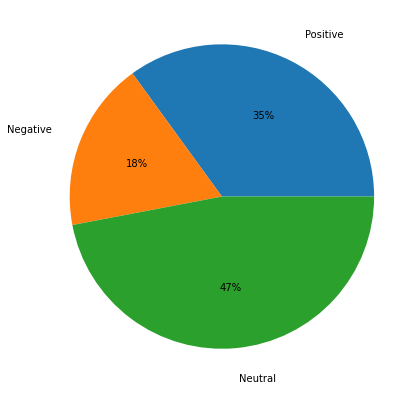

In [9]:
fig = plt.figure(figsize = (10,7))
plt.pie(percentages, labels=labels,autopct='%1.0f%%', labeldistance=1.2)
plt.show()